# Data:

Bank customer churn data from https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

## About the Data:

This dataset is for ABC Multistate bank with following columns:

1. **customer_id**, unused variable.
2. **credit_score**, used as input.
3. **country**, used as input.
4. **gender**, used as input.
5. **age**, used as input.
6. **tenure**, used as input.
7. **balance**, used as input.
8. **products_number**, used as input.
9. **credit_card**, used as input.
10. **active_member**, used as input.
11. **estimated_salary**, used as input.
12. **churn**, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

# Customer Churn

Customer churn or consumer attrition refers to a loss of existing customers for any reason at all. Businesses measure and track churn as a percentage of lost customers compared to total number of customers over a given time period. This metric is usually tracked monthly and reported at the end of the month. It's important to note that churn rates vary by industry and knowing your market is key to reducing churn with more precision.

# Goal:

***To predict customer churn based on the other factors using logistic regression***

In [1]:
# Getting th Data, index column = customer id

import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv', index_col = 'CustomerId')
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
15569892,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
15584532,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


In [2]:
# Dropping unnecessary columns

df = df.drop(['RowNumber', 'Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


***That is, since customer id is enough to identify a customer, there is no need for their surname in the set. Moreover, since customer id has been set as the index column, the column for row number isn't necessary either.***

In [3]:
# Presence of Null Values

df.isna().any()

CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

***There are no null values in the data. Thus, we do not need to deal any further with them.***

In [4]:
# Data Types in the columns

df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

***'Geography', 'Card Type' and 'Gender' are categorical. All others are numeric. Thus, we convert these columns into numeric.***

# Encoding Categorical Data into Numeric

## 1. Label Encoding Gender

In [5]:
# Label Encoding 'Gender'

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])

  
df['Gender'].unique()

array([0, 1])

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,
15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


#### Encoding:

*0 = Female*

*1 = Male*

## 2. One-Hot/ Dummy Encoding Geography and Card Type

### 2.1 Geography

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
# Encoding the data

one_hot_geo = pd.get_dummies(df[["Geography"]],
                         prefix="Geography",
                         drop_first=False)
one_hot_geo

,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,
15634602,1,0,0
15647311,0,0,1
15619304,1,0,0
15701354,1,0,0
15737888,0,0,1
...,...,...,...
15606229,1,0,0
15569892,1,0,0
15584532,1,0,0


In [9]:
# Appending this to the main df

df['France'] = one_hot_geo['Geography_France']
df['Germany'] = one_hot_geo['Geography_Germany']
df['Spain'] = one_hot_geo['Geography_Spain']
df.drop(['Geography'], axis = 1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,France,Germany,Spain
CustomerId,,,,,,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0,0,1
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,1,0,0
15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,1,0,0
15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,1,0,0


### 2.2. Card Type

In [10]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [11]:
# Getting the dummies

one_hot_card = pd.get_dummies(df[["Card Type"]],
                         prefix="Card Type",
                         drop_first=False)
one_hot_card

,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
CustomerId,,,,
15634602,1,0,0,0
15647311,1,0,0,0
15619304,1,0,0,0
15701354,0,1,0,0
15737888,0,1,0,0
...,...,...,...,...
15606229,1,0,0,0
15569892,0,0,1,0
15584532,0,0,0,1


In [12]:
# Appending them to the main df

df['Diamond'] = one_hot_card['Card Type_DIAMOND']
df['Gold'] = one_hot_card['Card Type_GOLD']
df['Platinum'] = one_hot_card['Card Type_PLATINUM']
df['Silver'] = one_hot_card['Card Type_SILVER']
df.drop(['Card Type'], axis = 1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,France,0,42,2,0.00,1,1,1,101348.88,...,1,2,464,1,0,0,1,0,0,0
15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,...,1,3,456,0,0,1,1,0,0,0
15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,...,1,3,377,1,0,0,1,0,0,0
15701354,699,France,0,39,1,0.00,2,0,0,93826.63,...,0,5,350,1,0,0,0,1,0,0
15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,...,0,5,425,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,1,39,5,0.00,2,1,0,96270.64,...,0,1,300,1,0,0,1,0,0,0
15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,...,0,5,771,1,0,0,0,0,1,0
15584532,709,France,0,36,7,0.00,1,0,1,42085.58,...,1,3,564,1,0,0,0,0,0,1


In [13]:
df = df.drop(['Geography'], axis = 1)
df = df.drop(['Card Type'], axis = 1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,300,1,0,0,1,0,0,0
15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,771,1,0,0,0,0,1,0
15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,564,1,0,0,0,0,0,1


# EDA

## 1. Summary Stats

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00


## 2. Outliers

### 2.1 Quartiles

In [15]:
# 1st quartile

Q1 = df.quantile(q = 0.25)
Q1

CreditScore             584.00
Gender                    0.00
Age                      32.00
Tenure                    3.00
Balance                   0.00
NumOfProducts             1.00
HasCrCard                 0.00
IsActiveMember            0.00
EstimatedSalary       51002.11
Exited                    0.00
Complain                  0.00
Satisfaction Score        2.00
Point Earned            410.00
France                    0.00
Germany                   0.00
Spain                     0.00
Diamond                   0.00
Gold                      0.00
Platinum                  0.00
Silver                    0.00
Name: 0.25, dtype: float64

In [16]:
# 3rd Quartile

Q3 = df.quantile(q = 0.75)
Q3

CreditScore              718.0000
Gender                     1.0000
Age                       44.0000
Tenure                     7.0000
Balance               127644.2400
NumOfProducts              2.0000
HasCrCard                  1.0000
IsActiveMember             1.0000
EstimatedSalary       149388.2475
Exited                     0.0000
Complain                   0.0000
Satisfaction Score         4.0000
Point Earned             801.0000
France                     1.0000
Germany                    1.0000
Spain                      0.0000
Diamond                    1.0000
Gold                       1.0000
Platinum                   0.0000
Silver                     0.0000
Name: 0.75, dtype: float64

### 2.2 Inter Quartile Range (IQR)

***$IQR = Q_{3} - Q_{1}$***

In [17]:
IQR = Q3 - Q1
IQR

CreditScore              134.0000
Gender                     1.0000
Age                       12.0000
Tenure                     4.0000
Balance               127644.2400
NumOfProducts              1.0000
HasCrCard                  1.0000
IsActiveMember             1.0000
EstimatedSalary        98386.1375
Exited                     0.0000
Complain                   0.0000
Satisfaction Score         2.0000
Point Earned             391.0000
France                     1.0000
Germany                    1.0000
Spain                      0.0000
Diamond                    1.0000
Gold                       1.0000
Platinum                   0.0000
Silver                     0.0000
dtype: float64

### 2.3 $1.5 \times IQR$

***Gives a range for 'normal' data***

In [18]:
Range = 1.5 * IQR
Range

CreditScore              201.00000
Gender                     1.50000
Age                       18.00000
Tenure                     6.00000
Balance               191466.36000
NumOfProducts              1.50000
HasCrCard                  1.50000
IsActiveMember             1.50000
EstimatedSalary       147579.20625
Exited                     0.00000
Complain                   0.00000
Satisfaction Score         3.00000
Point Earned             586.50000
France                     1.50000
Germany                    1.50000
Spain                      0.00000
Diamond                    1.50000
Gold                       1.50000
Platinum                   0.00000
Silver                     0.00000
dtype: float64

### 2.4. Limits for 'normal' data

1. ***$Lower Limit = Q_{1} - 1.5 \times IQR$***

2. ***$Upper Limit = Q_{3} + 1.5 \times IQR$***

In [19]:
# lower Limit

Low_lim = Q1 - Range
Low_lim

CreditScore              383.00000
Gender                    -1.50000
Age                       14.00000
Tenure                    -3.00000
Balance              -191466.36000
NumOfProducts             -0.50000
HasCrCard                 -1.50000
IsActiveMember            -1.50000
EstimatedSalary       -96577.09625
Exited                     0.00000
Complain                   0.00000
Satisfaction Score        -1.00000
Point Earned            -176.50000
France                    -1.50000
Germany                   -1.50000
Spain                      0.00000
Diamond                   -1.50000
Gold                      -1.50000
Platinum                   0.00000
Silver                     0.00000
dtype: float64

In [20]:
# Upper Limit

Up_lim = Q3 + Range
Up_lim

CreditScore              919.00000
Gender                     2.50000
Age                       62.00000
Tenure                    13.00000
Balance               319110.60000
NumOfProducts              3.50000
HasCrCard                  2.50000
IsActiveMember             2.50000
EstimatedSalary       296967.45375
Exited                     0.00000
Complain                   0.00000
Satisfaction Score         7.00000
Point Earned            1387.50000
France                     2.50000
Germany                    2.50000
Spain                      0.00000
Diamond                    2.50000
Gold                       2.50000
Platinum                   0.00000
Silver                     0.00000
dtype: float64

### Outliers

In [21]:
# Below lower limit

Lower_out = df[df < Low_lim].count()
Lower_out

CreditScore           15
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Point Earned           0
France                 0
Germany                0
Spain                  0
Diamond                0
Gold                   0
Platinum               0
Silver                 0
dtype: int64

In [22]:
# Over upper limit

Upper_out = df[df > Up_lim].count()
Upper_out

CreditScore              0
Gender                   0
Age                    359
Tenure                   0
Balance                  0
NumOfProducts           60
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                2038
Complain              2044
Satisfaction Score       0
Point Earned             0
France                   0
Germany                  0
Spain                 2477
Diamond                  0
Gold                     0
Platinum              2495
Silver                2496
dtype: int64

In [23]:
# Total Outliers

Outliers = Lower_out + Upper_out
Outliers

CreditScore             15
Gender                   0
Age                    359
Tenure                   0
Balance                  0
NumOfProducts           60
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                2038
Complain              2044
Satisfaction Score       0
Point Earned             0
France                   0
Germany                  0
Spain                 2477
Diamond                  0
Gold                     0
Platinum              2495
Silver                2496
dtype: int64

# Defining the dependent and independent variables

In [24]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [25]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,0,0
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,0,1,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,300,1,0,0,1,0,0,0
15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,5,771,1,0,0,0,0,1,0
15584532,709,0,36,7,0.00,1,0,1,42085.58,1,3,564,1,0,0,0,0,0,1


In [26]:
y.values.reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

# Splitting the Data into Train and Test

In [27]:
from sklearn.model_selection import train_test_split                    ### Split the Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [28]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,
15779481,628,1,34,4,158741.43,2,1,1,126192.54,0,3,983,1,0,0,0,0,1,0
15687658,716,0,52,7,65971.61,2,1,0,14608.00,1,2,450,1,0,0,0,0,1,0
15736124,617,1,25,1,102585.88,2,1,1,115387.40,0,5,779,1,0,0,0,0,0,1
15644005,571,0,33,9,0.00,2,0,1,77519.62,0,2,702,1,0,0,0,0,1,0
15791944,697,1,32,7,175464.85,3,1,0,116442.42,1,1,594,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584928,594,0,32,4,120074.97,2,1,1,162961.79,0,2,728,0,1,0,1,0,0,0
15647111,794,0,22,4,114440.24,1,1,1,107753.07,0,4,226,0,0,1,0,0,0,1
15574372,738,1,35,5,161274.05,2,1,0,181429.87,0,5,566,1,0,0,0,0,0,1


In [29]:
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,
15615753,597,0,35,8,131101.04,1,1,1,192852.67,0,3,758,0,1,0,0,0,0,1
15654700,523,0,40,2,102967.41,1,1,0,128702.10,1,1,606,1,0,0,0,0,1,0
15633877,706,0,42,8,95386.82,1,1,1,75732.25,0,5,734,0,0,1,0,0,0,1
15745623,788,1,32,4,112079.58,1,0,0,89368.59,0,1,645,1,0,0,0,0,0,1
15765902,706,1,38,5,163034.82,2,1,1,135662.17,0,3,826,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575486,529,0,27,1,0.00,2,1,1,37769.98,0,5,333,1,0,0,0,0,1,0
15742272,669,0,44,8,96418.09,1,0,0,131609.48,1,3,915,1,0,0,0,0,0,1
15618363,659,1,29,9,82916.48,1,1,1,84133.48,0,5,652,0,1,0,0,0,0,1


In [30]:
y_train

CustomerId
15779481    0
15687658    1
15736124    0
15644005    0
15791944    1
           ..
15584928    0
15647111    0
15574372    0
15664035    0
15592816    1
Name: Exited, Length: 9000, dtype: int64

In [31]:
y_test

CustomerId
15615753    0
15654700    1
15633877    0
15745623    0
15765902    0
           ..
15575486    0
15742272    1
15618363    0
15583764    0
15628999    0
Name: Exited, Length: 1000, dtype: int64

# Fitting the Logistic Regression

## Assumptions of Logistic Regression:

1. Binary Categorical Label (y)
2. Rows are independent of each other
3. Little/No multicollinearity (Feature Columns are independent of each other)
4. Features are linearly related to the log odds
5. Large Sample Size

In [32]:
#Defining the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [33]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
# Model Classes

model.classes_

array([0, 1], dtype=int64)

# Making Predictions

In [35]:
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba

array([0.19227381, 0.3327385 , 0.16990144, 0.09230647, 0.1622786 ,
       0.38896213, 0.14761957, 0.20262092, 0.42423641, 0.75629246,
       0.2292144 , 0.20491381, 0.26752362, 0.19254239, 0.20446328,
       0.32559756, 0.31902615, 0.42847748, 0.14632871, 0.27078599,
       0.21624424, 0.07306472, 0.14731683, 0.43186761, 0.05749341,
       0.20762771, 0.19090291, 0.22961591, 0.17235734, 0.18384592,
       0.14667948, 0.14248329, 0.23291915, 0.36927706, 0.07570942,
       0.06563129, 0.06210164, 0.04376315, 0.09441559, 0.13566957,
       0.23168386, 0.09278353, 0.46850029, 0.0628001 , 0.27476384,
       0.29933119, 0.25829615, 0.23379377, 0.13470158, 0.03714631,
       0.31220187, 0.12969953, 0.2336679 , 0.24991171, 0.43995942,
       0.11079282, 0.22944892, 0.06725927, 0.20184272, 0.1337238 ,
       0.11531803, 0.20180408, 0.10374828, 0.29427259, 0.18278784,
       0.1984596 , 0.1128323 , 0.39453418, 0.10206566, 0.41425941,
       0.53779581, 0.14643738, 0.07034678, 0.36907321, 0.11888

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model Evaluation

## 1. Confusion Matrix

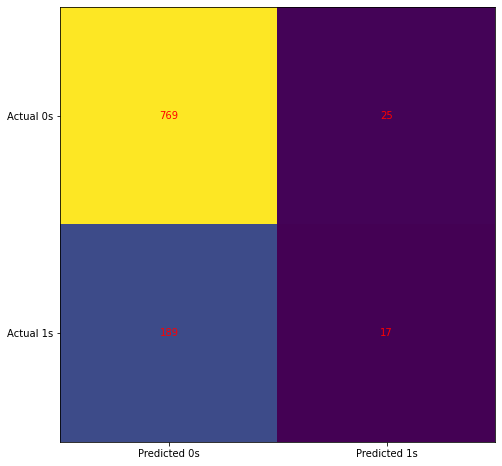

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [39]:
# False positive rate

fpr

array([0.        , 0.        , 0.00251889, 0.00251889, 0.00503778,
       0.00503778, 0.00755668, 0.00755668, 0.00881612, 0.00881612,
       0.01007557, 0.01007557, 0.01259446, 0.01259446, 0.01511335,
       0.01511335, 0.01763224, 0.01763224, 0.02518892, 0.02518892,
       0.02770781, 0.02770781, 0.0302267 , 0.0302267 , 0.03400504,
       0.03400504, 0.03526448, 0.03526448, 0.03652393, 0.03652393,
       0.03778338, 0.03778338, 0.0440806 , 0.0440806 , 0.04534005,
       0.04534005, 0.0465995 , 0.0465995 , 0.04785894, 0.04785894,
       0.04911839, 0.04911839, 0.05163728, 0.05163728, 0.05289673,
       0.05289673, 0.05415617, 0.05415617, 0.05667506, 0.05667506,
       0.05793451, 0.05793451, 0.0604534 , 0.0604534 , 0.06171285,
       0.06171285, 0.06297229, 0.06297229, 0.06423174, 0.06423174,
       0.06549118, 0.06549118, 0.07052897, 0.07052897, 0.07304786,
       0.07304786, 0.07556675, 0.07556675, 0.0768262 , 0.0768262 ,
       0.07808564, 0.07808564, 0.07934509, 0.07934509, 0.08060

In [40]:
tpr

array([0.        , 0.00485437, 0.00485437, 0.00970874, 0.00970874,
       0.01941748, 0.01941748, 0.02427184, 0.02427184, 0.02912621,
       0.02912621, 0.03398058, 0.03398058, 0.03883495, 0.03883495,
       0.04368932, 0.04368932, 0.04854369, 0.04854369, 0.05825243,
       0.05825243, 0.06796117, 0.06796117, 0.08252427, 0.08252427,
       0.08737864, 0.08737864, 0.09223301, 0.09223301, 0.10194175,
       0.10194175, 0.10679612, 0.10679612, 0.12135922, 0.12135922,
       0.12621359, 0.12621359, 0.13592233, 0.13592233, 0.1407767 ,
       0.1407767 , 0.15533981, 0.15533981, 0.16504854, 0.16504854,
       0.16990291, 0.16990291, 0.17961165, 0.17961165, 0.18932039,
       0.18932039, 0.19417476, 0.19417476, 0.20873786, 0.20873786,
       0.2184466 , 0.2184466 , 0.23300971, 0.23300971, 0.24271845,
       0.24271845, 0.25242718, 0.25242718, 0.25728155, 0.25728155,
       0.26213592, 0.26213592, 0.27184466, 0.27184466, 0.27669903,
       0.27669903, 0.2961165 , 0.2961165 , 0.31553398, 0.31553

## 2. ROC curve & AUC

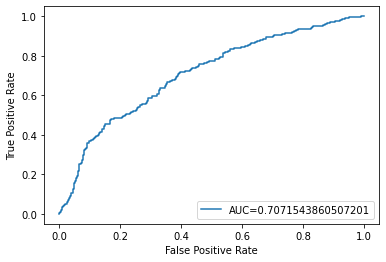

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

***That is, the probability of the model assigning larger probability to a random positive example than a random negative example is 0.7***

# Improving the Model - AdaBoost Classifier

In [42]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
CustomerId,,,,,,,,,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,300,1,0,0,1,0,0,0
15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,771,1,0,0,0,0,1,0
15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,564,1,0,0,0,0,0,1


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00


In [44]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer with 1 stump trees
Ada_classifier = AdaBoostClassifier(n_estimators= df.shape[1]-1)

In [45]:
# Train Adaboost Classifer
AdaBoost = Ada_classifier.fit(X_train, y_train)

In [46]:
#Predict the response for test dataset
y_pred = AdaBoost.predict(X_test)

In [47]:
# importing the module
from sklearn.metrics import accuracy_score
# printing
print("The accuracy of the model is:  ", accuracy_score(y_test, y_pred))

The accuracy of the model is:   1.0
